# Model Definition, Training and Evaluation
 

Now it’s time to start modelling. So, this is where it really depends on your use case and data set how you want to proceed. For example, if you are in an unsupervised context you can choose between an auto-encoder, PCA or clustering. Or if you are in a supervised context you have choice between different state-of-the-art machine learning and deep learning algorithms. But here are some guidelines which are required to follow:

 

- Choose, justify and apply a **model performance indicator** (e.g. F1 score, true positive rate, within cluster sum of squared error, …) to assess your model and justify the choice of an algorithm

- Implement your algorithm in at least **one deep learning** and at least **one non-deep learning** algorithm, **compare and document model performance**

- Apply at least one **additional iteration in** the process model involving **at least the feature creation task** and record impact on model performance (e.g. data normalizing, PCA, …)

Depending on the algorithm class and data set size you might choose specific technologies / frameworks to solve your problem. Please document all your decisions in the ADD (Architectural Decisions Document).

Once you think you have achieved a descent model performance save the notebook according to the process model’s naming convention and proceed to the model training task.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [2]:
!wget https://raw.githubusercontent.com/spyderroque/IBM_Advance_Data_Science/main/Capstone/weather/Climate_day_train_feature.parquet

Der Befehl "wget" ist entweder falsch geschrieben oder
konnte nicht gefunden werden.


In [2]:
df = pd.read_parquet('Climate_day_train_feature.parquet')

In [3]:
df.head()

,Date,Wind_avg,Precepitation,sunshine_hours,snow_height,Coverage_avg,Vapour_p_avg,Air_p_avg,Temp_avg,Rel_Humid_avg,Rain,Snow,RainAndSnow
0,1991-01-01,4.5,7.1,3.7,0,4.7,7.0,1010.8,4.8,82.0,1,0,0
1,1991-01-02,9.2,3.8,0.0,0,7.3,10.7,996.7,11.4,81.0,1,0,0
2,1991-01-03,5.3,9.2,0.0,0,7.3,9.6,1001.9,8.6,85.0,1,0,0
3,1991-01-04,6.2,0.4,4.1,0,6.3,7.9,1003.5,6.8,79.0,1,0,0
4,1991-01-05,7.7,2.9,1.1,0,5.3,7.1,1000.4,6.6,74.0,1,0,0


Let's generate normalized values

In [4]:
temp1 =np.array(df.iloc[:,1:12])
scaled_data_array = MinMaxScaler().fit_transform(temp1)

In [5]:
column_headers = list(df.iloc[:,1:12].columns)
df_norm = pd.DataFrame(scaled_data_array, columns = column_headers)
df_norm['Date'] = df['Date']
df_norm = df_norm.reindex(columns = list(df.columns))
df_norm.head()
df_norm.tail()

,Date,Wind_avg,Precepitation,sunshine_hours,snow_height,Coverage_avg,Vapour_p_avg,Air_p_avg,Temp_avg,Rel_Humid_avg,Rain,Snow,RainAndSnow
11217,2021-12-27,0.440945,0.017422,0.079187,0.0,0.8750,0.339535,0.337937,0.460699,0.891892,1.0,0.0,NaN
11218,2021-12-28,0.433071,0.259582,0.006250,0.0,0.8875,0.409302,0.257610,0.508734,0.899730,1.0,0.0,NaN
11219,2021-12-29,0.385827,0.108014,0.011437,0.0,0.9750,0.451163,0.425169,0.530568,0.914459,1.0,0.0,NaN
11220,2021-12-30,0.488189,0.001742,0.000000,0.0,0.9500,0.586047,0.558484,0.615721,0.876081,1.0,0.0,NaN
11221,2021-12-31,0.425197,0.000000,0.089563,0.0,0.8625,0.511628,0.616826,0.609170,0.755676,1.0,0.0,NaN


In [6]:
# something is not right here with the hot encoded precepitation values. At least it seems like that to me
list(df.columns)

['Date',
 'Wind_avg',
 'Precepitation',
 'sunshine_hours',
 'snow_height',
 'Coverage_avg',
 'Vapour_p_avg',
 'Air_p_avg',
 'Temp_avg',
 'Rel_Humid_avg',
 'Rain',
 'Snow',
 'RainAndSnow']

In [12]:
df_norm.describe()

,Wind_avg,Precepitation,sunshine_hours,snow_height,Coverage_avg,Vapour_p_avg,Air_p_avg,Temp_avg,Rel_Humid_avg,Rain,Snow,RainAndSnow
count,11222.000000,11222.000000,11222.000000,11222.000000,11222.00000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,0.0
mean,0.289354,0.035926,0.273083,0.004205,0.65263,0.408011,0.564333,0.560564,0.667402,0.573962,0.024951,NaN
std,0.140101,0.073853,0.265221,0.036889,0.26270,0.180744,0.129194,0.148132,0.157974,0.494521,0.155983,NaN
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.181102,0.000000,0.025000,0.000000,0.50000,0.265116,0.487599,0.451965,0.567568,0.000000,0.000000,NaN
50%,0.267717,0.001742,0.200000,0.000000,0.71250,0.386047,0.569335,0.561135,0.689189,1.000000,0.000000,NaN
75%,0.377953,0.040070,0.462500,0.000000,0.87500,0.539535,0.648253,0.672489,0.783784,1.000000,0.000000,NaN
max,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN


In [13]:
df.describe()

,Wind_avg,Precepitation,sunshine_hours,snow_height,Coverage_avg,Vapour_p_avg,Air_p_avg,Temp_avg,Rel_Humid_avg,Rain,Snow,RainAndSnow
count,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000
mean,3.974791,2.062146,4.369322,0.113527,5.221039,10.372233,1011.145100,11.073846,75.387749,0.573962,0.024951,0.056407
std,1.779277,4.239138,4.243528,0.995998,2.101599,3.885992,9.167585,6.784468,11.690102,0.494521,0.155983,0.230716
min,0.300000,0.000000,0.000000,0.000000,0.000000,1.600000,971.100000,-14.600000,26.000000,0.000000,0.000000,0.000000
25%,2.600000,0.000000,0.400000,0.000000,4.000000,7.300000,1005.700000,6.100000,68.000000,0.000000,0.000000,0.000000
50%,3.700000,0.100000,3.200000,0.000000,5.700000,9.900000,1011.500000,11.100000,77.000000,1.000000,0.000000,0.000000
75%,5.100000,2.300000,7.400000,0.000000,7.000000,13.200000,1017.100000,16.200000,84.000000,1.000000,0.000000,0.000000
max,13.000000,57.400000,16.000000,27.000000,8.000000,23.100000,1042.060000,31.200000,100.000000,1.000000,1.000000,1.000000


In [14]:
df_norm.dtypes

Date               object
Wind_avg          float64
Precepitation     float64
sunshine_hours    float64
snow_height       float64
Coverage_avg      float64
Vapour_p_avg      float64
Air_p_avg         float64
Temp_avg          float64
Rel_Humid_avg     float64
Rain              float64
Snow              float64
RainAndSnow       float64
dtype: object

In [15]:
df.dtypes

Date               object
Wind_avg          float64
Precepitation     float64
sunshine_hours    float64
snow_height         int64
Coverage_avg      float64
Vapour_p_avg      float64
Air_p_avg         float64
Temp_avg          float64
Rel_Humid_avg     float64
Rain                uint8
Snow                uint8
RainAndSnow         uint8
dtype: object

In [16]:
# I got no idea what's wrong woth the last column, but I will simmply replace the values within the hot-encoded columns by the original values

In [6]:
df_norm['RainAndSnow'] = df['RainAndSnow']
df_norm['Rain'] = df['Rain']
df_norm['Snow'] = df['Snow']

In [8]:
df_norm.describe()

,Wind_avg,Precepitation,sunshine_hours,snow_height,Coverage_avg,Vapour_p_avg,Air_p_avg,Temp_avg,Rel_Humid_avg,Rain,Snow,RainAndSnow
count,11222.000000,11222.000000,11222.000000,11222.000000,11222.00000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000
mean,0.289354,0.035926,0.273083,0.004205,0.65263,0.408011,0.564333,0.560564,0.667402,0.573962,0.024951,0.056407
std,0.140101,0.073853,0.265221,0.036889,0.26270,0.180744,0.129194,0.148132,0.157974,0.494521,0.155983,0.230716
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.181102,0.000000,0.025000,0.000000,0.50000,0.265116,0.487599,0.451965,0.567568,0.000000,0.000000,0.000000
50%,0.267717,0.001742,0.200000,0.000000,0.71250,0.386047,0.569335,0.561135,0.689189,1.000000,0.000000,0.000000
75%,0.377953,0.040070,0.462500,0.000000,0.87500,0.539535,0.648253,0.672489,0.783784,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df_norm.dtypes

Date               object
Wind_avg          float64
Precepitation     float64
sunshine_hours    float64
snow_height       float64
Coverage_avg      float64
Vapour_p_avg      float64
Air_p_avg         float64
Temp_avg          float64
Rel_Humid_avg     float64
Rain                uint8
Snow                uint8
RainAndSnow         uint8
dtype: object

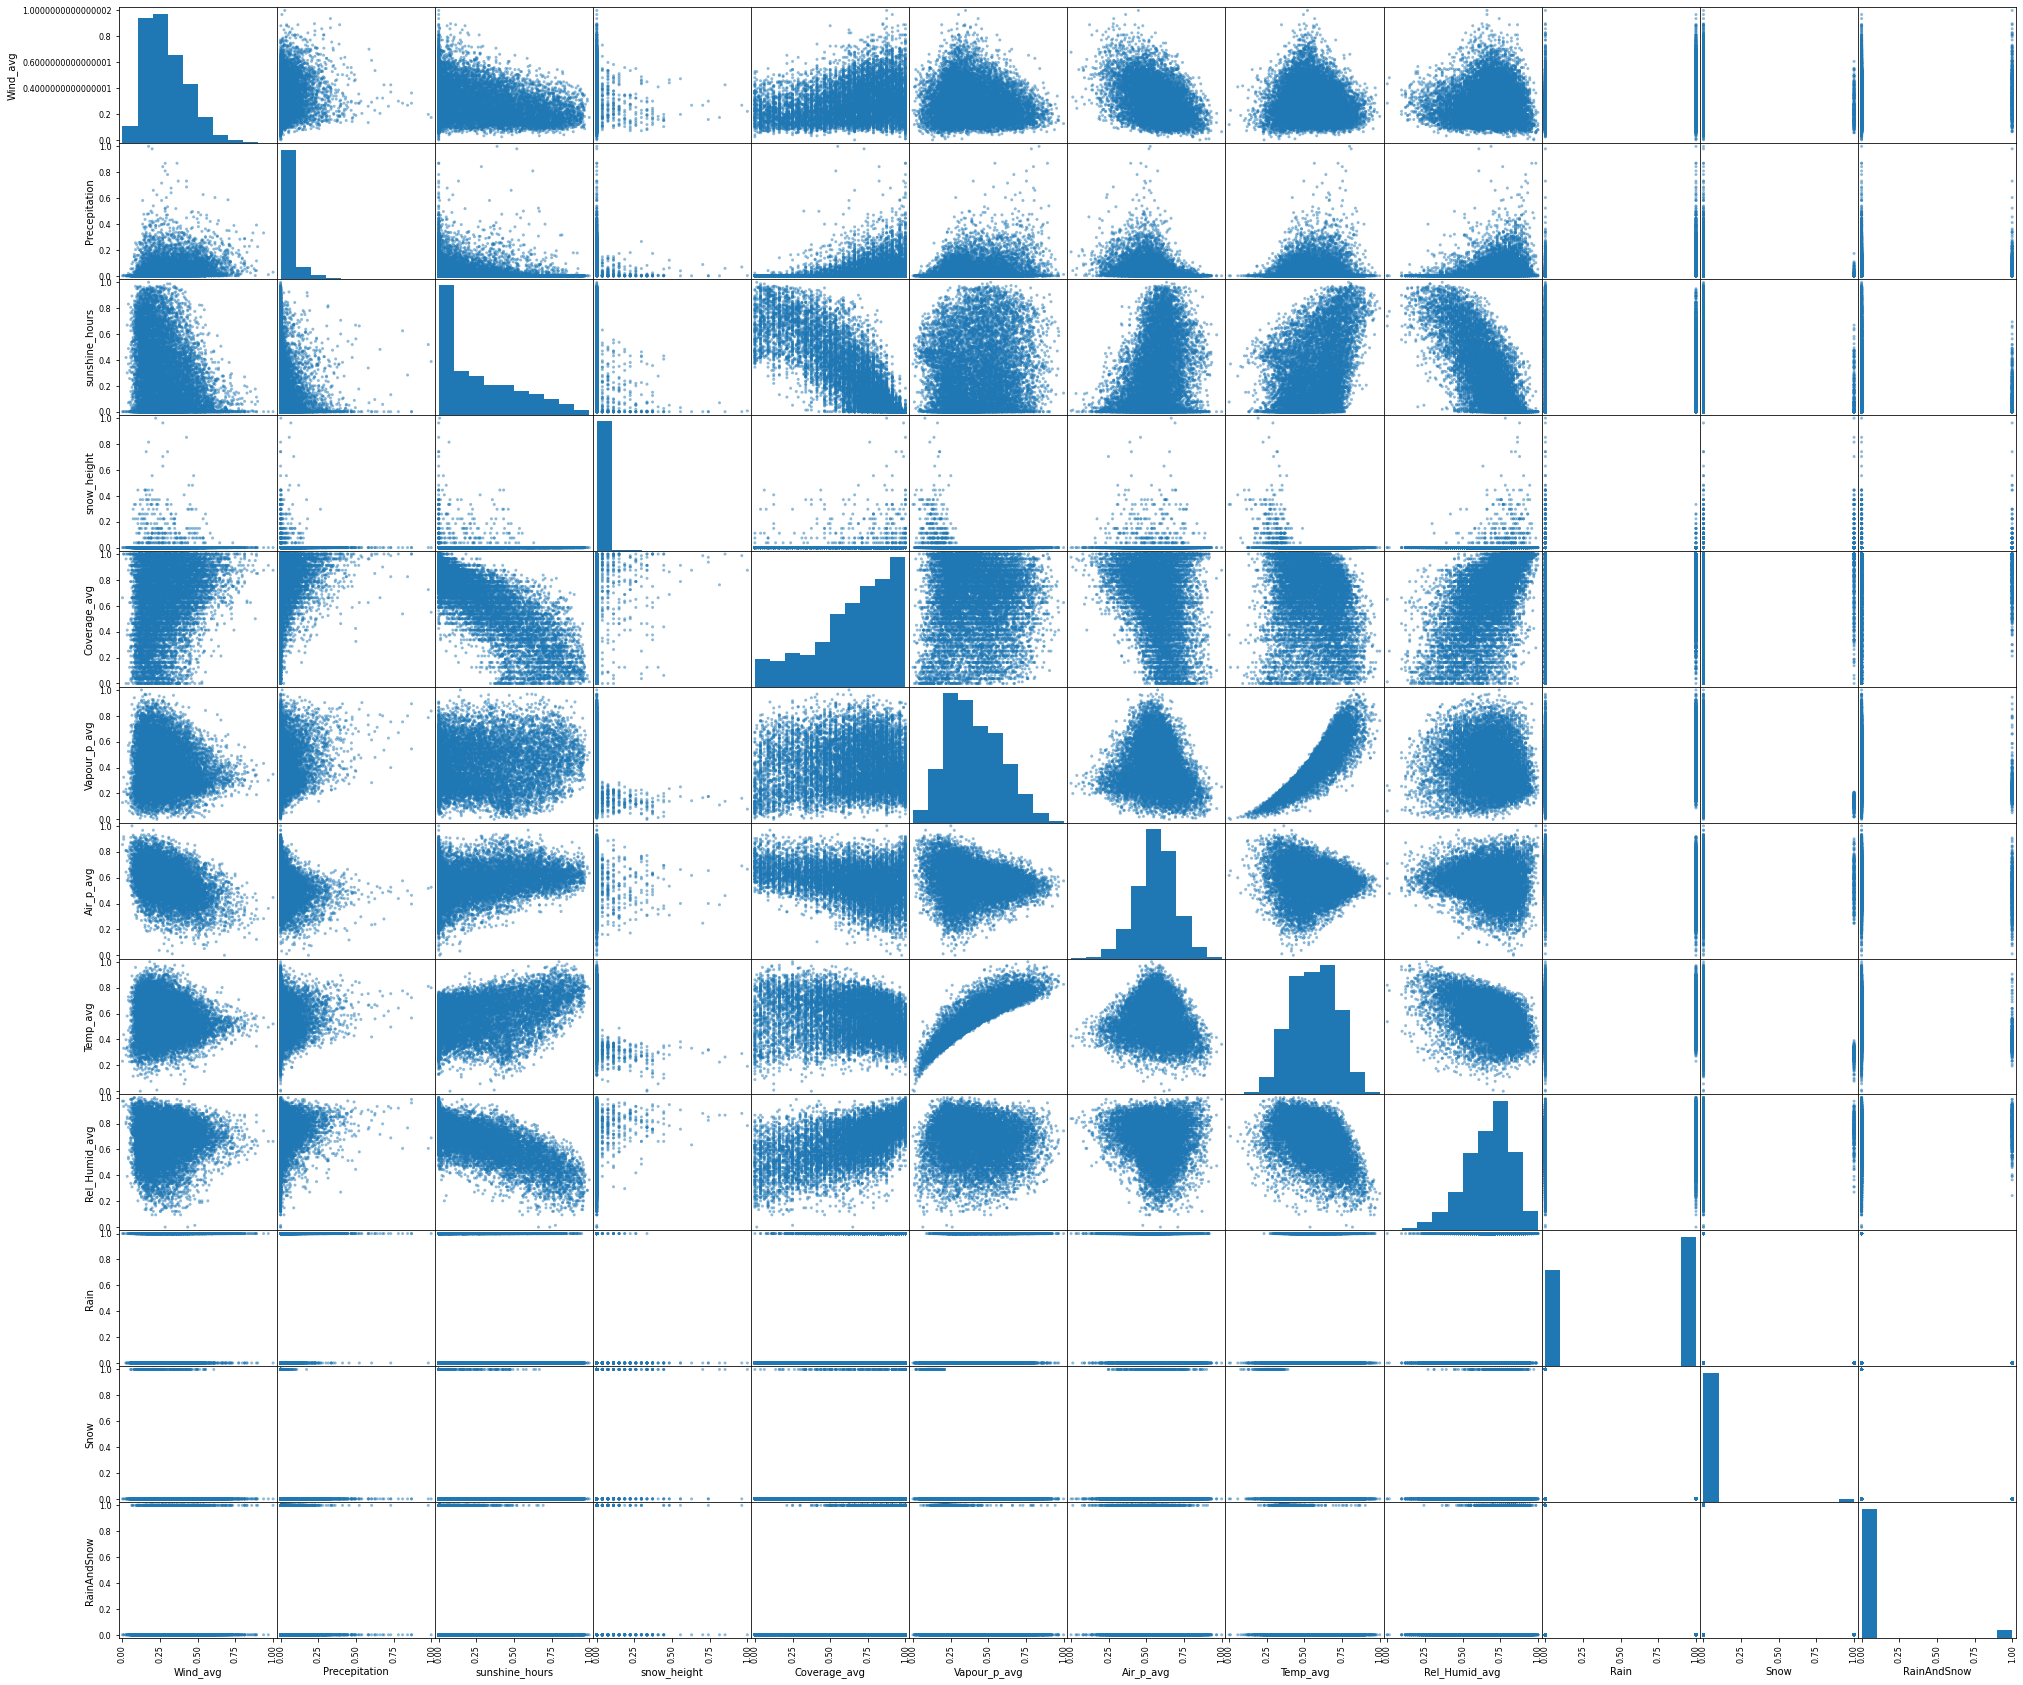

In [30]:
#let's take a renewed look at the scatter matrix:
pd.plotting.scatter_matrix(df_norm, figsize = (34,30))
plt.show()

In [31]:
# looks pretty much identical to the not normalised version. So I guess this has been done correctly

### At this point the normalized data was analysed. I did it in a seperate file by the name of _Advanced Data Science Capstone.EDA.ipynb_

Conclusions from the EDA are:
* the hours of sunshine is inversely related to the coverage and to the time of year, which seems plausible, given the change of the sun's declination
* Vapour pressure and temperature obviously have a correlation, however, the content of the vapour pressure seems to increase of the years.

As model indicator I must use something, which can be applied to time series models. Hence it will be:
* **RMSE**
* **R^2** for comparision between the baseline model and the one after an iteration 
* I might use median based indicators **MAD**, if I can somehow cluster the data. Since it's known, that climate change will show it's effect (we see it in the EDA), the classification probably will be difficult (clustering by year, etc.)

A-priori ideas for potential model iterations:
* add the approx. declination of the earth
* cluster the data into month and weeks

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [2]:
#let's import necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import SplineTransformer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error

https://www.projectpro.io/recipes/find-optimal-parameters-using-gridsearchcv-for-regression

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingRegressor.html#sklearn.ensemble.HistGradientBoostingRegressor

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/tutorial/statistical_inference/putting_together.html

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

https://github.com/spyderroque/IBM-Data-Science/blob/main/10-Applied-Data-Science-Capstone/07-SpaceX_Machine%20Learning%20Prediction_Part_5.ipynb

https://github.com/spyderroque/IBM-Data-Science/blob/main/09-Machine-Learning-with-Python/03-Reg-Polynomial-Regression-Co2.ipynb

https://github.com/spyderroque/IBM-Data-Science/blob/main/09-Machine-Learning-with-Python/04-Reg-NoneLinearRegression.ipynb

https://scikit-learn.org/stable/auto_examples/applications/plot_cyclical_feature_engineering.html

In [3]:
# let's start simple. I need a trianing set and a test set. The training set coould be as follows.
# df_train: 1991 till end of 2020.
# df_test: 2021 till today

df2 = pd.read_csv('produkt_klima_tag_20210303_20220903_01078.txt', sep=';')
df2.drop(columns=['eor','STATIONS_ID'], inplace=True)
df2 = df2[df2['MESS_DATUM']>20220100]
column_headers = list(df2.columns)
column_names = ['Date','Qual_wind', 'Wind_max', 'Wind_avg','Qual_precep', 'Precepitation', 'Type_of_Precipitation',
'sunshine_hours','snow_height', 'Coverage_avg', 'Vapour_p_avg', 'Air_p_avg', 'Temp_avg', 'Rel_Humid_avg', 'Temp_max_2m', 'Temp_min_2m', 'Temp_min_gnd']
column_renamed = dict(zip(column_headers, column_names))
df2.rename(columns=column_renamed, inplace=True)
#df2['Date']=df2['Date'].astype('string')
df2['Date']= pd.to_datetime(df2['Date'], format = "%Y%m%d")
df2 = df2.drop(df2[df2['Wind_max'] == -999].index)
# the snow_height is at some point given with not measured. probably a malfunction of the sensor. But as it is, there was no snow in Germany in this area
df2['snow_height'].replace(to_replace = -999, value = 0, inplace = True)
df2.drop(columns =['Temp_max_2m', 'Temp_min_2m', 'Temp_min_gnd', 'Wind_max'], inplace = True)
df2.drop(columns = ['Qual_wind', 'Qual_precep'], inplace = True)
df_ToP = pd.get_dummies(df2['Type_of_Precipitation'])
df_ToP.rename(columns = {0: 'NoRainOrSnoW', 6:'Rain', 7:'Snow',8:'RainAndSnow'}, inplace = True)
df2=df2.join(df_ToP)
df2.drop(columns = 'Type_of_Precipitation', inplace = True)
df2.drop(columns = 'NoRainOrSnoW', inplace = True)
del df_ToP # delete df_ToP and free up memory
df2.head()

,Date,Wind_avg,Precepitation,sunshine_hours,snow_height,Coverage_avg,Vapour_p_avg,Air_p_avg,Temp_avg,Rel_Humid_avg,4,Rain,RainAndSnow
304,2022-01-01,5.2,0.6,0.733,0,7.0,12.2,1018.26,12.8,82.33,0,1,0
305,2022-01-02,7.2,14.1,0.000,0,7.4,11.3,1009.30,11.4,84.00,0,1,0
306,2022-01-03,6.9,4.7,0.050,0,6.2,10.1,1005.45,9.7,84.58,0,1,0
307,2022-01-04,3.7,9.1,0.000,0,8.0,9.2,993.75,6.8,93.25,0,1,0
308,2022-01-05,6.8,1.1,0.000,0,6.3,7.1,1001.48,3.8,87.63,0,1,0


In [4]:
# let's start simple. I need a trianing set and a test set. The training set coould be as follows.
# df_train: 1991 till end of 2020.
# df_test: 2021 till today

df1 = pd.read_csv('produkt_klima_tag_19520101_20211231_01078.txt', sep=';')
df1.drop(columns=['eor','STATIONS_ID'], inplace=True)
df1 = df1[df1['MESS_DATUM']>19910100]
column_headers = list(df1.columns)
column_names = ['Date','Qual_wind', 'Wind_max', 'Wind_avg','Qual_precep', 'Precepitation', 'Type_of_Precipitation',
'sunshine_hours','snow_height', 'Coverage_avg', 'Vapour_p_avg', 'Air_p_avg', 'Temp_avg', 'Rel_Humid_avg', 'Temp_max_2m', 'Temp_min_2m', 'Temp_min_gnd']
column_renamed = dict(zip(column_headers, column_names))
df1.rename(columns=column_renamed, inplace=True)
#df1['Date']=df1['Date'].astype('string')
df1['Date']= pd.to_datetime(df1['Date'], format = "%Y%m%d")
df1 = df1.drop(df1[df1['Wind_max'] == -999].index)
# the snow_height is at some point given with not measured. probably a malfunction of the sensor. But as it is, there was no snow in Germany in this area
for i in column_names:
    df1[i].replace(to_replace = -999, value = 0, inplace = True)
df1.drop(columns =['Temp_max_2m', 'Temp_min_2m', 'Temp_min_gnd', 'Wind_max'], inplace = True)
df1.drop(columns = ['Qual_wind', 'Qual_precep'], inplace = True)
df_ToP = pd.get_dummies(df1['Type_of_Precipitation'])
df_ToP.rename(columns = {0: 'NoRainOrSnoW', 6:'Rain', 7:'Snow',8:'RainAndSnow'}, inplace = True)
df1=df1.join(df_ToP)
df1.drop(columns = 'Type_of_Precipitation', inplace = True)
df1.drop(columns = 'NoRainOrSnoW', inplace = True)
del df_ToP # delete df_ToP and free up memory
df1.head()

,Date,Wind_avg,Precepitation,sunshine_hours,snow_height,Coverage_avg,Vapour_p_avg,Air_p_avg,Temp_avg,Rel_Humid_avg,Rain,Snow,RainAndSnow
14245,1991-01-01,4.5,7.1,3.7,0,4.7,7.0,1010.8,4.8,82.0,1,0,0
14246,1991-01-02,9.2,3.8,0.0,0,7.3,10.7,996.7,11.4,81.0,1,0,0
14247,1991-01-03,5.3,9.2,0.0,0,7.3,9.6,1001.9,8.6,85.0,1,0,0
14248,1991-01-04,6.2,0.4,4.1,0,6.3,7.9,1003.5,6.8,79.0,1,0,0
14249,1991-01-05,7.7,2.9,1.1,0,5.3,7.1,1000.4,6.6,74.0,1,0,0


In [5]:
msk_train = (df1['Date']>='1991-01-01') & (df1['Date'] < '2021-01-01')
msk_test = (df1['Date']>='2021-01-01')
df_train = df1.loc[msk_train, :]
df_test = pd.concat([df1.loc[msk_test, :], df2])
df_test.reset_index(drop = True)
df_train.reset_index(drop = True)

,Date,Wind_avg,Precepitation,sunshine_hours,snow_height,Coverage_avg,Vapour_p_avg,Air_p_avg,Temp_avg,Rel_Humid_avg,Rain,Snow,RainAndSnow
0,1991-01-01,4.5,7.1,3.70,0,4.7,7.0,1010.80,4.8,82.00,1,0,0
1,1991-01-02,9.2,3.8,0.00,0,7.3,10.7,996.70,11.4,81.00,1,0,0
2,1991-01-03,5.3,9.2,0.00,0,7.3,9.6,1001.90,8.6,85.00,1,0,0
3,1991-01-04,6.2,0.4,4.10,0,6.3,7.9,1003.50,6.8,79.00,1,0,0
4,1991-01-05,7.7,2.9,1.10,0,5.3,7.1,1000.40,6.6,74.00,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10900,2020-12-27,11.0,13.1,0.00,0,7.6,6.7,983.25,4.8,77.33,1,0,0
10901,2020-12-28,4.1,0.4,2.25,0,7.0,7.1,973.41,4.3,85.58,1,0,0
10902,2020-12-29,3.8,0.0,0.00,0,5.0,6.1,983.34,1.5,89.50,1,0,0
10903,2020-12-30,4.5,2.6,0.00,0,7.2,6.9,996.39,3.6,87.04,1,0,0


In [6]:
del df1
del df2


In [7]:
# now let's take a look at a model for Temperature. We alread know that
# the temperature is cyclic and related to the declination of the earth.
# So the solution must be a non linear regression analysis. We also know
# that there is a climate change and the temperature is increasing. 

In [8]:
df_train_w = df_train.set_index('Date', verify_integrity=True).resample('W').mean()

In [9]:
df_train_w.head()

,Wind_avg,Precepitation,sunshine_hours,snow_height,Coverage_avg,Vapour_p_avg,Air_p_avg,Temp_avg,Rel_Humid_avg,Rain,Snow,RainAndSnow
Date,,,,,,,,,,,,
1991-01-06,7.166667,3.900000,1.633333,0.0,6.100000,8.066667,1001.600000,7.433333,77.333333,0.833333,0.0,0.000000
1991-01-13,5.671429,2.285714,1.685714,0.0,6.057143,7.900000,1006.728571,7.200000,77.142857,0.857143,0.0,0.000000
1991-01-20,4.557143,0.928571,5.814286,0.0,2.185714,4.228571,1025.900000,1.285714,62.428571,0.142857,0.0,0.142857
1991-01-27,1.757143,0.100000,0.100000,0.0,6.814286,6.042857,1030.271429,1.700000,85.857143,0.285714,0.0,0.000000
1991-02-03,2.128571,0.000000,5.542857,0.0,1.285714,3.700000,1023.171429,-1.400000,65.571429,0.000000,0.0,0.000000


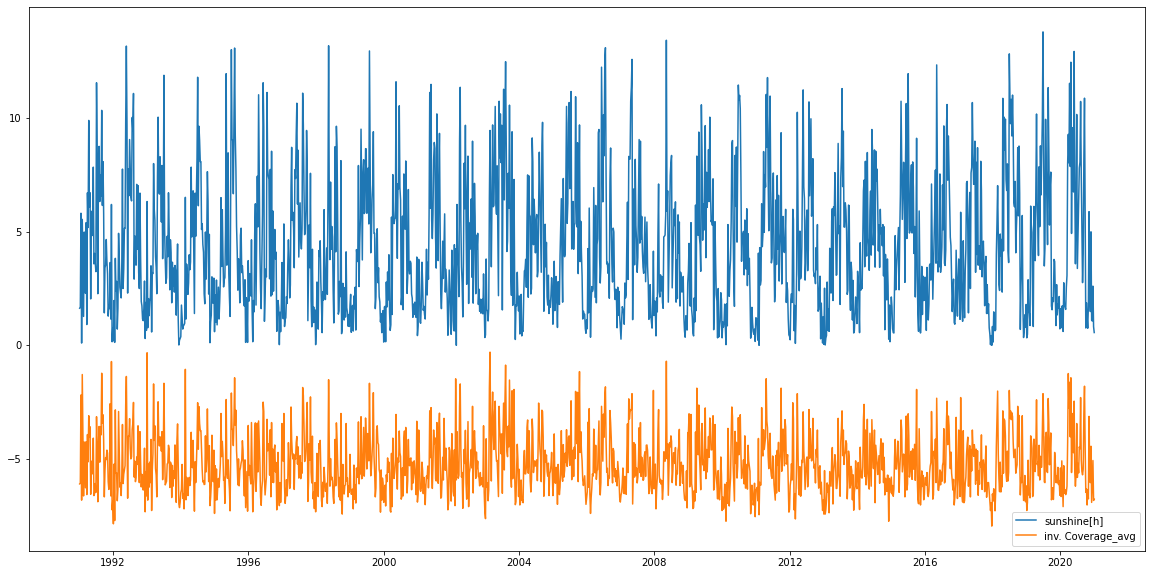

In [10]:
fig = plt.figure(figsize=(20,10))
plt.plot (df_train_w['sunshine_hours'], label = 'sunshine[h]')
plt.plot(-df_train_w['Coverage_avg'], label = 'inv. Coverage_avg')
plt.legend()
plt.show()

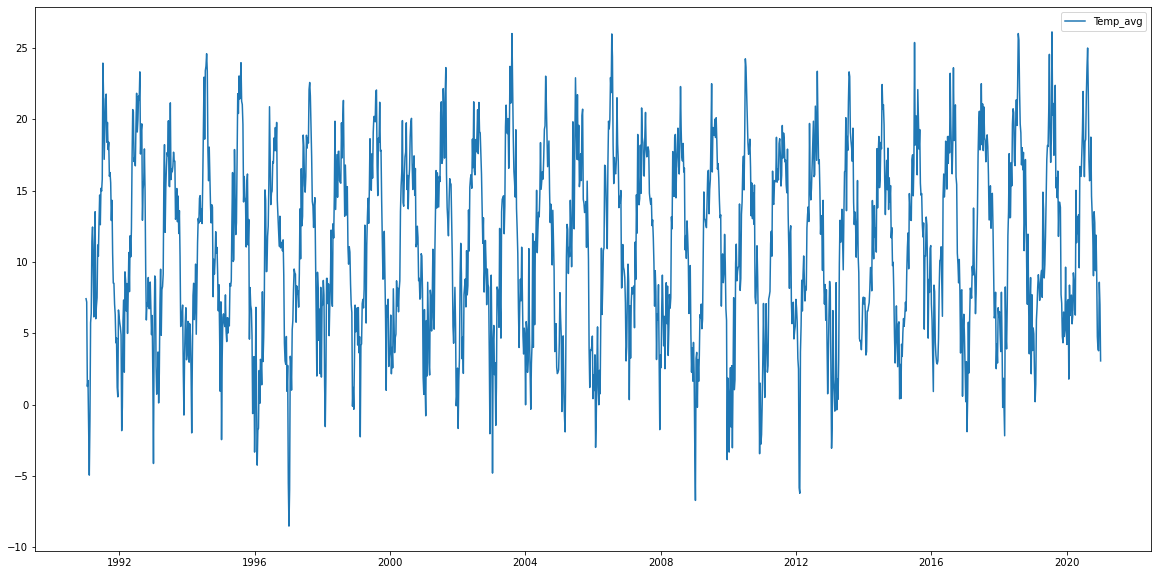

In [11]:
fig = plt.figure(figsize=(20,10))
#plt.plot (df_train_w['Vapour_p_avg'], label = 'Vapour_p_avg')
plt.plot(df_train_w['Temp_avg'], label = 'Temp_avg')
#plt.plot(df_train_w['Rel_Humid_avg'], label = 'Rel_Humid_avg')
plt.legend()
plt.show()

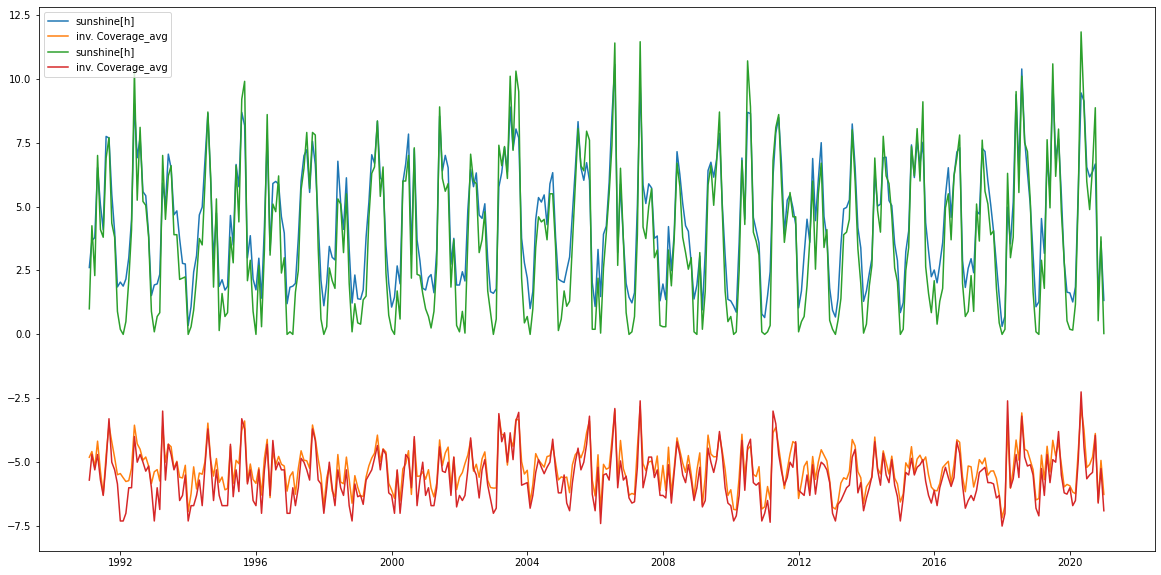

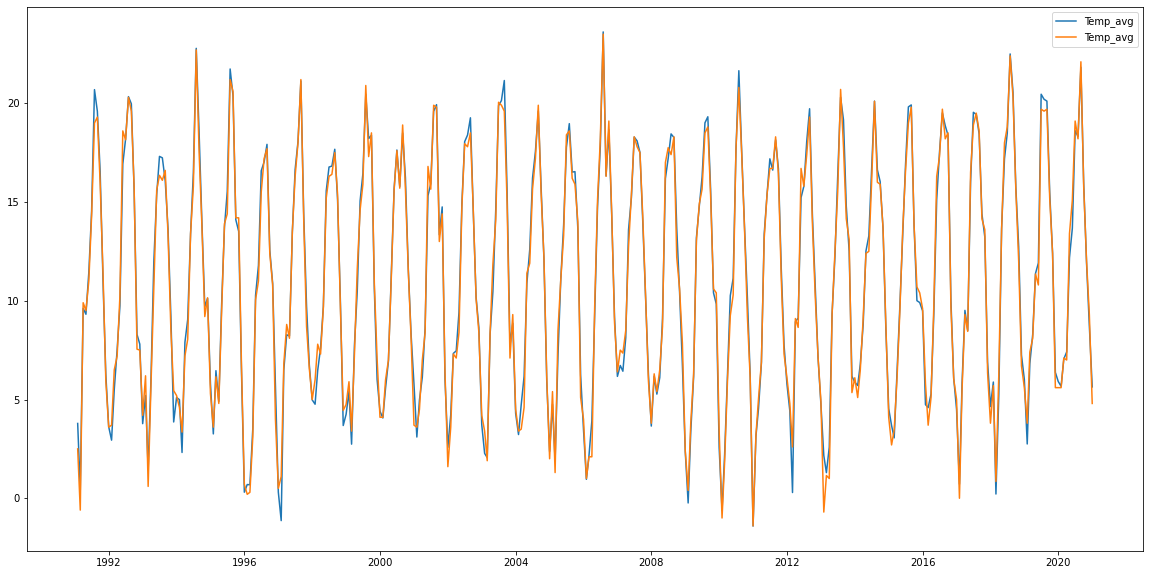

In [12]:
df_train_m = df_train.set_index('Date', verify_integrity=True).resample('M').mean()
df_train_mmed = df_train.set_index('Date', verify_integrity=True).resample('M').median()

fig = plt.figure(figsize=(20,10))
plt.plot (df_train_m['sunshine_hours'], label = 'sunshine[h]')
plt.plot(-df_train_m['Coverage_avg'], label = 'inv. Coverage_avg')
plt.plot (df_train_mmed['sunshine_hours'], label = 'sunshine[h]')
plt.plot(-df_train_mmed['Coverage_avg'], label = 'inv. Coverage_avg')
plt.legend()
plt.show()

fig = plt.figure(figsize=(20,10))
#plt.plot (df_train_w['Vapour_p_avg'], label = 'Vapour_p_avg')
plt.plot(df_train_m['Temp_avg'], label = 'Temp_avg')
plt.plot(df_train_mmed['Temp_avg'], label = 'Temp_avg')
#plt.plot(df_train_w['Rel_Humid_avg'], label = 'Rel_Humid_avg')
plt.legend()
plt.show()

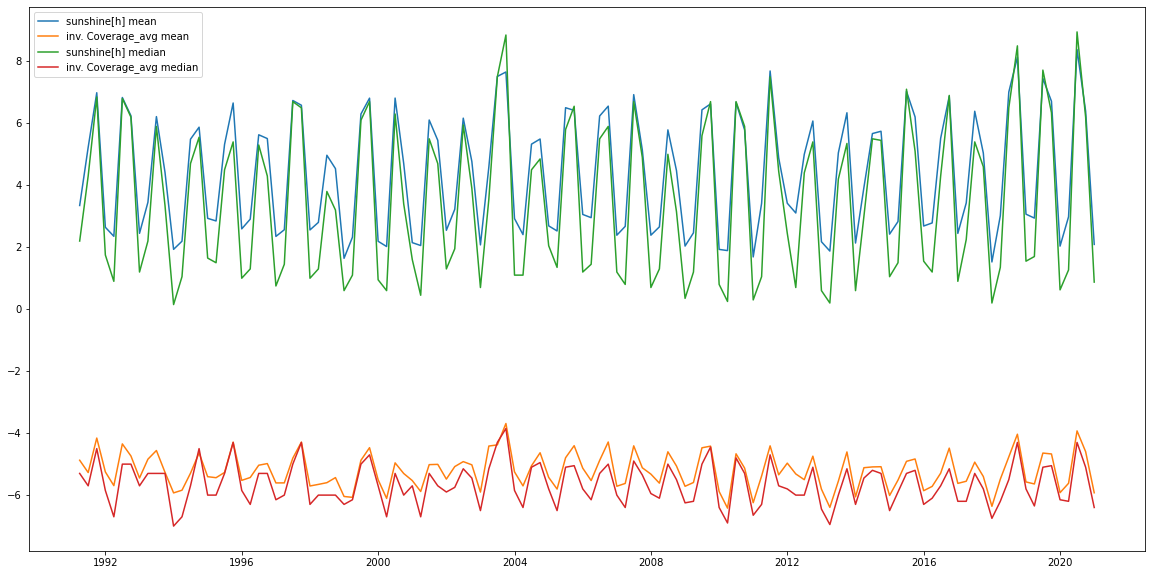

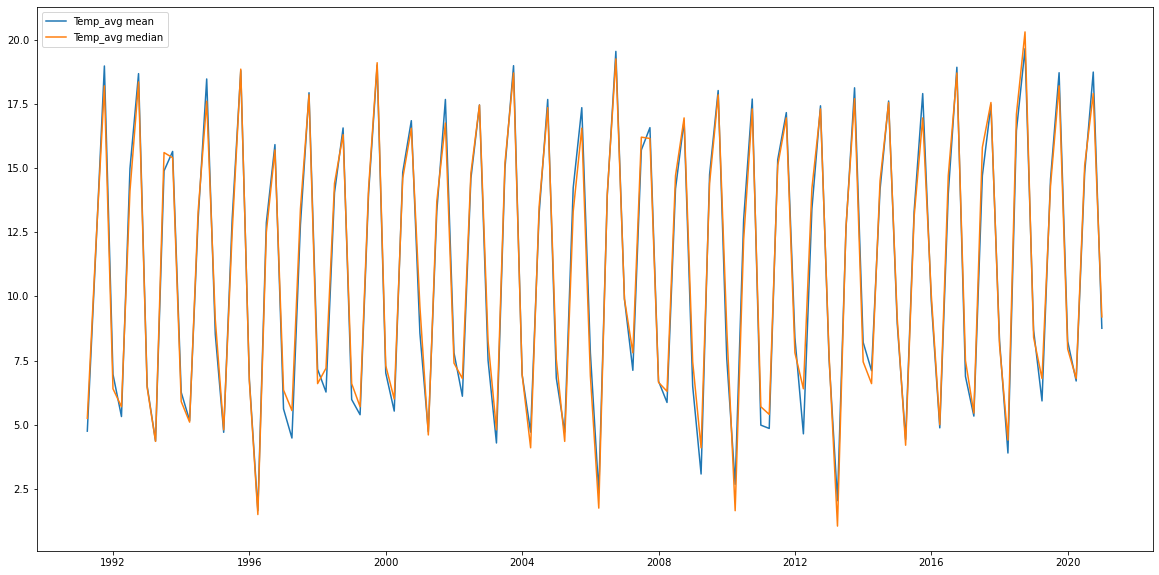

In [13]:
df_train_q = df_train.set_index('Date', verify_integrity=True).resample('Q').mean()
df_train_qmed = df_train.set_index('Date', verify_integrity=True).resample('Q').median()

fig = plt.figure(figsize=(20,10))
plt.plot (df_train_q['sunshine_hours'], label = 'sunshine[h] mean')
plt.plot(-df_train_q['Coverage_avg'], label = 'inv. Coverage_avg mean')
plt.plot (df_train_qmed['sunshine_hours'], label = 'sunshine[h] median')
plt.plot(-df_train_qmed['Coverage_avg'], label = 'inv. Coverage_avg median')
plt.legend()
plt.show()

fig = plt.figure(figsize=(20,10))
#plt.plot (df_train_w['Vapour_p_avg'], label = 'Vapour_p_avg')
plt.plot(df_train_q['Temp_avg'], label = 'Temp_avg mean')
plt.plot(df_train_qmed['Temp_avg'], label = 'Temp_avg median')
#plt.plot(df_train_w['Rel_Humid_avg'], label = 'Rel_Humid_avg')
plt.legend()
plt.show()

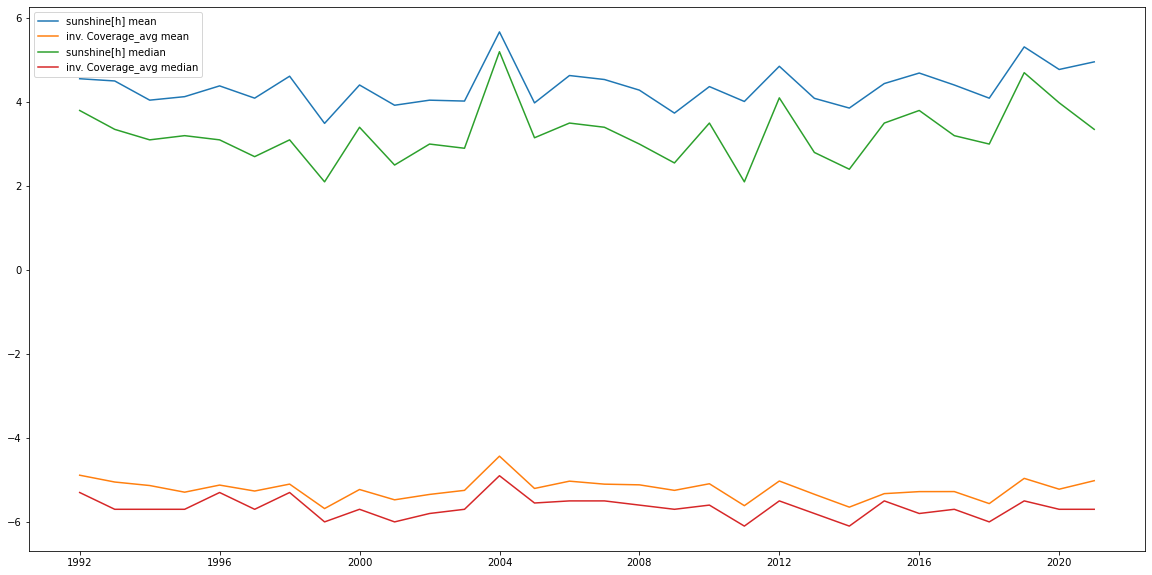

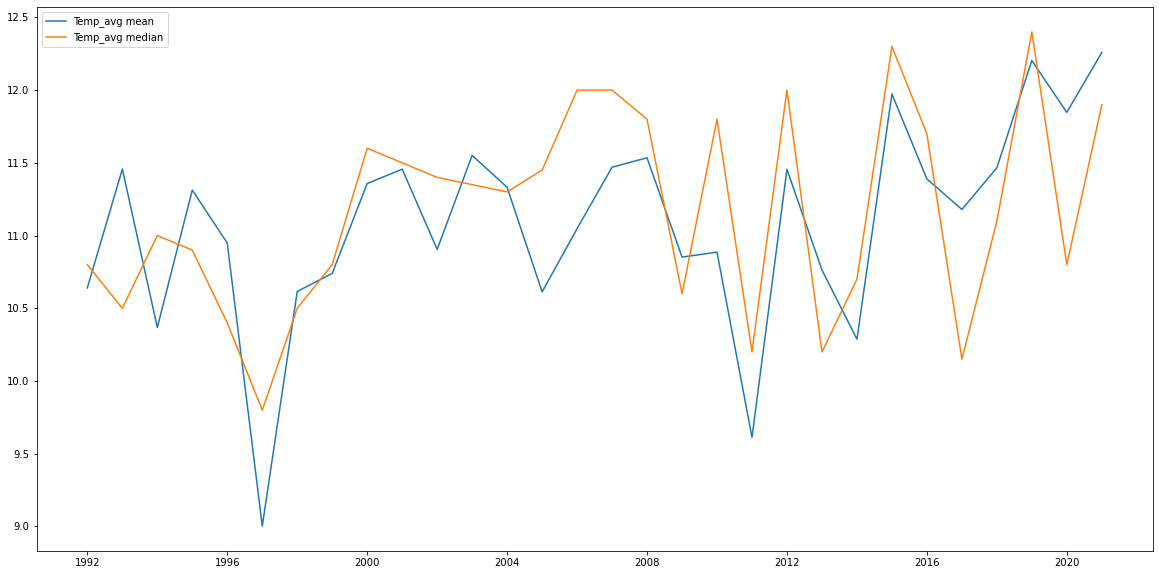

In [14]:
df_train_y = df_train.set_index('Date', verify_integrity=True).resample('Y').mean()
df_train_ymed = df_train.set_index('Date', verify_integrity=True).resample('Y').median()

fig = plt.figure(figsize=(20,10))
plt.plot (df_train_y['sunshine_hours'], label = 'sunshine[h] mean')
plt.plot(-df_train_y['Coverage_avg'], label = 'inv. Coverage_avg mean')
plt.plot (df_train_ymed['sunshine_hours'], label = 'sunshine[h] median')
plt.plot(-df_train_ymed['Coverage_avg'], label = 'inv. Coverage_avg median')
plt.legend()
plt.show()

fig = plt.figure(figsize=(20,10))
#plt.plot (df_train_w['Vapour_p_avg'], label = 'Vapour_p_avg')
plt.plot(df_train_y['Temp_avg'], label = 'Temp_avg mean')
plt.plot(df_train_ymed['Temp_avg'], label = 'Temp_avg median')

#plt.plot(df_train_w['Rel_Humid_avg'], label = 'Rel_Humid_avg')
plt.legend()
plt.show()

In [15]:
# apparently there is yet another suoerimposed cyclic effect and a termperature increase. 
# so the model needs a cyclic term for within the year and a cyclic term for the year as weel as a term for the increase itself. 
# the average temperature seems to be the best choice for it

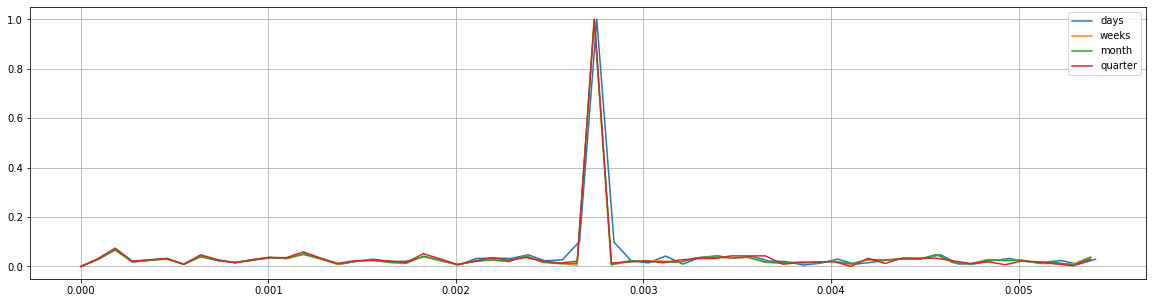

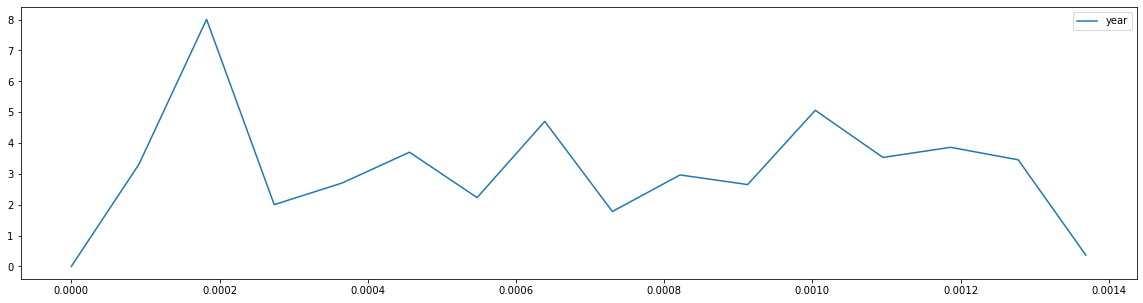

In [16]:
from numpy.fft import rfft, rfftfreq
X = df_train['Temp_avg'] - df_train['Temp_avg'].mean()
X = X.to_numpy()
F = np.fft.rfft(X)#[:-1]
freq = rfftfreq(len(X),1)
pw = np.abs(F)**2
alt = np.abs(F)
fig = plt.figure(figsize=(20,5))
plt.plot(freq[0:60], alt[0:60]/max(alt[0:60]), label = 'days')
plt.legend()

X = df_train_w['Temp_avg'] - df_train_w['Temp_avg'].mean()
X = X.to_numpy()
F = rfft(X)#[:-1]
freq = rfftfreq(len(X),7)
pw = np.abs(F)**2
alt = np.abs(F)
#fig = plt.figure(figsize=(20,5))
plt.plot(freq[0:60], alt[0:60]/max(alt[0:60]), label = 'weeks')
plt.legend()

X = df_train_m['Temp_avg'] - df_train_m['Temp_avg'].mean()
X = X.to_numpy()
F = rfft(X)#[:-1]
freq = rfftfreq(len(X),30.4375)
pw = np.abs(F)**2
alt = np.abs(F)
#fig = plt.figure(figsize=(20,5))
plt.plot(freq[0:60], alt[0:60]/max(alt[0:60]), label = 'month')
plt.legend()

X = df_train_q['Temp_avg'] - df_train_q['Temp_avg'].mean()
X = X.to_numpy()
F = rfft(X)#[:-1]
freq = rfftfreq(len(X),91.31)
pw = np.abs(F)**2
alt = np.abs(F)
#fig = plt.figure(figsize=(20,5))
plt.plot(freq[0:60], alt[0:60]/max(alt[0:60]), label = 'quarter')
plt.legend()
plt.grid()

X = df_train_y['Temp_avg'] - df_train_y['Temp_avg'].mean()
X = X.to_numpy()
F = rfft(X)#[:-1]
freq = rfftfreq(len(X),365.25)
pw = np.abs(F)**2
alt = np.abs(F)
fig = plt.figure(figsize=(20,5))
plt.plot(freq, alt, label = 'year')
plt.legend()

plt.show()

In [17]:
X = df_train['Temp_avg'] - df_train['Temp_avg'].mean()
X = X.to_numpy()
F = np.fft.rfft(X)#[:-1]
freq = rfftfreq(len(X),1)
alt = np.abs(F)
max(alt)


43776.719054403926

In [18]:
1/0.000625

1600.0

In [19]:
1/365.25

0.0027378507871321013

In [100]:
# So the only remarkable frequency is that of an year. 
# Let's start with a manual done regression model. This is justfied considering the insights we have gained by now.
# x is the day, z2 could / should be 365 days 
def regression_model(x_value, w1, w2, z1, z2):
    t_hat = z1 + w1 * x_value + w2 * np.cos(x_value / z2)
    #t_hat = w2 * np.cos(x_value / z2)
    return t_hat

In [101]:
#let's tryto fit that thing!
# first I need a new feature, which is the difference to the starting date 01-01-1991
X_numbers = []
X_numbers.append(6)
for day in range (1, df_train_w.shape[0]):
    X_numbers.append(X_numbers[day-1]+7)
X_numbers = np.asarray(X_numbers)

X_weeks = np.arange(start= 1, stop= df_train_w.shape[0]+1)
# as can be ssen, this is weeks, so the consequent values should be in weeks as well
y_values = df_train_w[['Temp_avg']].reset_index()

In [85]:
y_values.drop(columns='Date')

,Temp_avg
0,7.433333
1,7.200000
2,1.285714
3,1.700000
4,-1.400000
...,...
1561,3.871429
1562,3.785714
1563,8.585714
1564,7.014286


In [102]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(regression_model, X_weeks, y_values.iloc[:,1])#df_train_w['Temp_avg'])
#print the final parameters
print(" w1 = %f, w2 = %f, z1 = %f, z2 = %f" % (popt[0], popt[1], popt[2], popt[3]))

 w1 = 0.000765, w2 = -0.140415, z1 = 10.464819, z2 = 1.000356


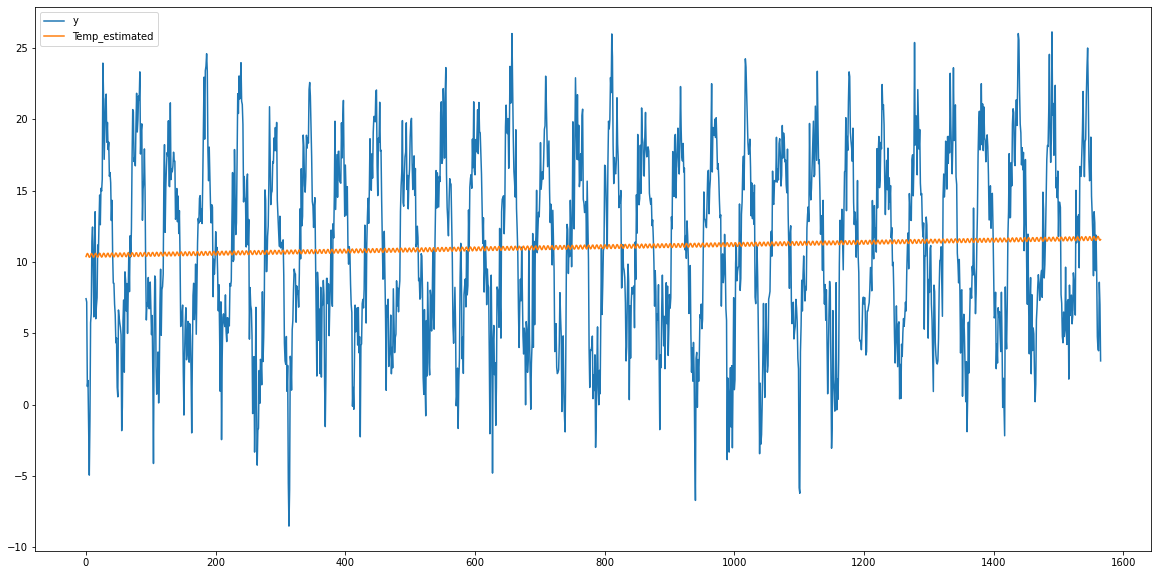

In [103]:
temperature_estimated = regression_model(X_weeks, *popt)
fig = plt.figure(figsize=(20,10))
plt.plot(y_values.iloc[:,1], label = 'y')
#plt.plot(df_train_w['Temp_avg'], label = 'Temp_avg_data')
plt.plot(temperature_estimated, label = 'Temp_estimated')
plt.legend()
plt.show()

In [26]:
X_numbers

array([    6,    13,    20, ..., 10947, 10954, 10961])